#Preprocessing and Text Normalization

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Download stopwords from NLTK
nltk.download('stopwords')
marathi_stopwords = set(stopwords.words('english'))

# Define Gujarati stopwords



# Load the dataset
data = pd.read_csv('english.csv')  # Replace with your actual path

# Text cleaning function for normalization
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z ]', '', text)  # Keep only English alphabet characters
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = ' '.join([word for word in text.split() if word not in marathi_stopwords])  # Remove stopwords
    return text

# Apply the text cleaning function to the 'Sentence' column
data['cleaned_text'] = data['Sentence'].apply(clean_text)

# Filter sentences based on length (e.g., between 5 and 50 words)
min_length = 5
max_length = 50

def filter_sentence_length(text):
    word_count = len(text.split())
    return min_length <= word_count <= max_length

data = data[data['cleaned_text'].apply(filter_sentence_length)]

# Label encoding for Sentiment and Emotion
sentiment_encoder = LabelEncoder()
emotion_encoder = LabelEncoder()

data['Sentiment_encoded'] = sentiment_encoder.fit_transform(data['Sentiment'])
data['Emotion_encoded'] = emotion_encoder.fit_transform(data['Emotion'])

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_text'])

# Splitting the dataset into training and testing sets
X_train_sent, X_test_sent, y_train_sent, y_test_sent = train_test_split(X, data['Sentiment_encoded'], test_size=0.2, random_state=42)
X_train_emo, X_test_emo, y_train_emo, y_test_emo = train_test_split(X, data['Emotion_encoded'], test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-1-5438b8788f48>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment_encoded'] = sentiment_encoder.fit_transform(data['Sentiment'])
<ipython-input-1-5438b8788f48>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Emotion_encoded'] = emotion_encoder.fit_transform(data['Emotion'])


#Training the Logistic Regression Models

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize Logistic Regression model with class balancing
sentiment_model = LogisticRegression(max_iter=1000, class_weight='balanced')
emotion_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the sentiment model
sentiment_model.fit(X_train_sent, y_train_sent)

# Train the emotion model
emotion_model.fit(X_train_emo, y_train_emo)

# Make predictions on test data
y_pred_sent = sentiment_model.predict(X_test_sent)
y_pred_emo = emotion_model.predict(X_test_emo)

# Evaluate sentiment model
accuracy_sent = accuracy_score(y_test_sent, y_pred_sent)
precision_sent = precision_score(y_test_sent, y_pred_sent, average='weighted')
recall_sent = recall_score(y_test_sent, y_pred_sent, average='weighted')
f1_sent = f1_score(y_test_sent, y_pred_sent, average='weighted')
conf_matrix_sent = confusion_matrix(y_test_sent, y_pred_sent)

# Evaluate emotion model
accuracy_emo = accuracy_score(y_test_emo, y_pred_emo)
precision_emo = precision_score(y_test_emo, y_pred_emo, average='weighted')
recall_emo = recall_score(y_test_emo, y_pred_emo, average='weighted')
f1_emo = f1_score(y_test_emo, y_pred_emo, average='weighted')
conf_matrix_emo = confusion_matrix(y_test_emo, y_pred_emo)

# Display the evaluation metrics for Sentiment
print("Sentiment Model Evaluation:")
print(f"Accuracy: {accuracy_sent}")
print(f"Precision: {precision_sent}")
print(f"Recall: {recall_sent}")
print(f"F1 Score: {f1_sent}")
print("Confusion Matrix:")
print(conf_matrix_sent)

# Display the evaluation metrics for Emotion
print("\nEmotion Model Evaluation:")
print(f"Accuracy: {accuracy_emo}")
print(f"Precision: {precision_emo}")
print(f"Recall: {recall_emo}")
print(f"F1 Score: {f1_emo}")
print("Confusion Matrix:")
print(conf_matrix_emo)


Sentiment Model Evaluation:
Accuracy: 0.9857516457750924
Precision: 0.9857525597516927
Recall: 0.9857516457750924
F1 Score: 0.9857512054971179
Confusion Matrix:
[[7966    0    1]
 [   1 7132  148]
 [   0  166 6764]]

Emotion Model Evaluation:
Accuracy: 0.9724501758499414
Precision: 0.9727028652474832
Recall: 0.9724501758499414
F1 Score: 0.972469124625805
Confusion Matrix:
[[2165    0    3    0    1    0    9   32    0]
 [   0 2537    0    0    0    0    0    0    0]
 [  27    0 2597    0   26    4   20   96    0]
 [   0    0    0 2302    0    0    1    0   93]
 [   2    0   11    0 1810    8   17   14    0]
 [   0    0    4    0   10 3111   13    8    0]
 [   8    0    6    0    7    2 1880   19    0]
 [  30    0   24    0    6    6   17 2218    0]
 [   0    1    0   86    0    0    0    0 2947]]


#Testing with Custom Gujarati Sentences and Their English Translation

In [3]:
# Custom sentences for testing (Gujarati poetry)
custom_sentences = ["In your laughter, I find my heart’s melody dancing through every shared moment",
"Like sunbeams breaking clouds, your smile ignites warmth, filling the air with light",
"Lost in echoes of absence I wander shadows where fading memories linger dimly",
"Each tear falls like raindrops on earth nurturing wounds of aching hearts",
"In quiet dawn I breathe deeply, embracing life’s ebb letting go completely"
]

# English translations for reference
english_translations = [" ",
" ",
" ",
" ",
" "

]

# Preprocess the custom sentences
custom_processed_sentences = [clean_text(sentence) for sentence in custom_sentences]

# Transform the custom sentences using the TF-IDF vectorizer
custom_tfidf = tfidf.transform(custom_processed_sentences)

# Predict sentiment for custom sentences
custom_sentiment_pred = sentiment_model.predict(custom_tfidf)
custom_emotion_pred = emotion_model.predict(custom_tfidf)

# Decode the predictions
custom_sentiment_labels = sentiment_encoder.inverse_transform(custom_sentiment_pred)
custom_emotion_labels = emotion_encoder.inverse_transform(custom_emotion_pred)

# Display the predictions alongside the original sentences and English translations
for i, sentence in enumerate(custom_sentences):
    print(f"Gujarati Sentence: {sentence}")
    print(f"English Translation: {english_translations[i]}")
    print(f"Predicted Sentiment: {custom_sentiment_labels[i]}")
    print(f"Predicted Emotion: {custom_emotion_labels[i]}")
    print("-" * 50)


Gujarati Sentence: In your laughter, I find my heart’s melody dancing through every shared moment
English Translation:  
Predicted Sentiment: Neutral
Predicted Emotion: Acceptance
--------------------------------------------------
Gujarati Sentence: Like sunbeams breaking clouds, your smile ignites warmth, filling the air with light
English Translation:  
Predicted Sentiment: Positive
Predicted Emotion: Joy
--------------------------------------------------
Gujarati Sentence: Lost in echoes of absence I wander shadows where fading memories linger dimly
English Translation:  
Predicted Sentiment: Negative
Predicted Emotion: Calm
--------------------------------------------------
Gujarati Sentence: Each tear falls like raindrops on earth nurturing wounds of aching hearts
English Translation:  
Predicted Sentiment: Negative
Predicted Emotion: Sadness
--------------------------------------------------
Gujarati Sentence: In quiet dawn I breathe deeply, embracing life’s ebb letting go comple

#ROC and AUC Curve Plotting

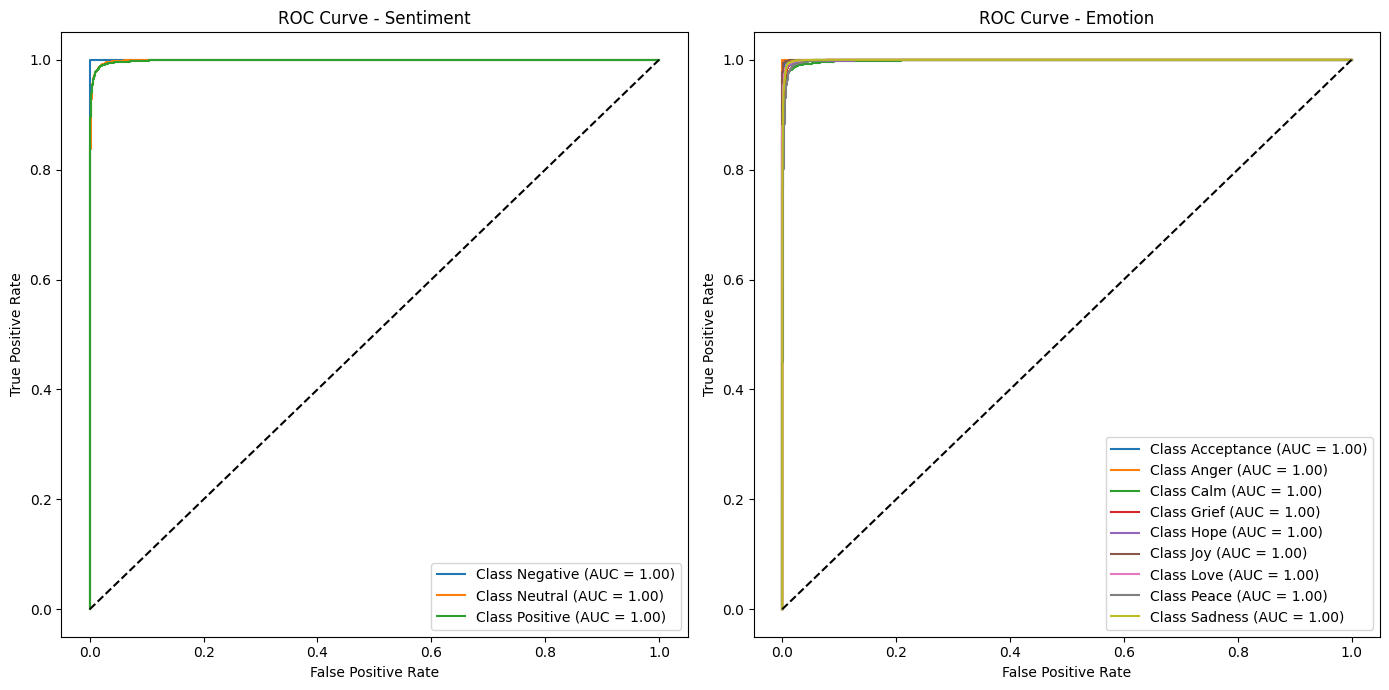

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels for multi-class ROC/AUC
y_test_sent_binarized = label_binarize(y_test_sent, classes=range(len(sentiment_encoder.classes_)))
y_test_emo_binarized = label_binarize(y_test_emo, classes=range(len(emotion_encoder.classes_)))

# Get the predicted probabilities
y_pred_sent_proba = sentiment_model.predict_proba(X_test_sent)
y_pred_emo_proba = emotion_model.predict_proba(X_test_emo)

# Plot ROC and AUC for Sentiment
fpr_sent = {}
tpr_sent = {}
roc_auc_sent = {}

for i in range(len(sentiment_encoder.classes_)):
    fpr_sent[i], tpr_sent[i], _ = roc_curve(y_test_sent_binarized[:, i], y_pred_sent_proba[:, i])
    roc_auc_sent[i] = auc(fpr_sent[i], tpr_sent[i])

plt.figure(figsize=(14, 7))

# Plot ROC curves for Sentiment
plt.subplot(1, 2, 1)
for i in range(len(sentiment_encoder.classes_)):
    plt.plot(fpr_sent[i], tpr_sent[i], label=f'Class {sentiment_encoder.classes_[i]} (AUC = {roc_auc_sent[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Sentiment')
plt.legend(loc="lower right")

# Plot ROC and AUC for Emotion
fpr_emo = {}
tpr_emo = {}
roc_auc_emo = {}

for i in range(len(emotion_encoder.classes_)):
    fpr_emo[i], tpr_emo[i], _ = roc_curve(y_test_emo_binarized[:, i], y_pred_emo_proba[:, i])
    roc_auc_emo[i] = auc(fpr_emo[i], tpr_emo[i])

# Plot ROC curves for Emotion
plt.subplot(1, 2, 2)
for i in range(len(emotion_encoder.classes_)):
    plt.plot(fpr_emo[i], tpr_emo[i], label=f'Class {emotion_encoder.classes_[i]} (AUC = {roc_auc_emo[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Emotion')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


#Double Bar Graph for True vs Predicted (Sentiment and Emotion)

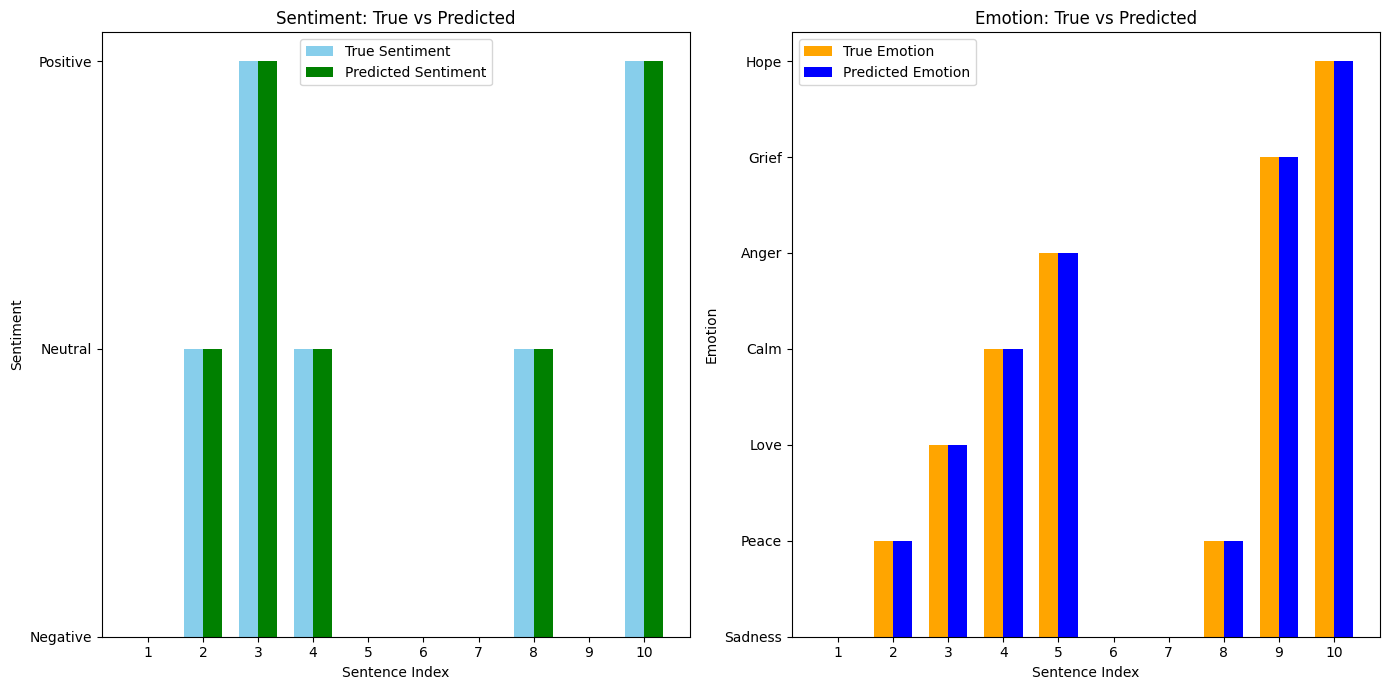

In [5]:
import numpy as np

# Randomly select 10 sentences from the dataset for testing
sample_data = data.sample(n=10, random_state=42)
sample_sentences = sample_data['Sentence'].tolist()
sample_true_sentiments = sample_data['Sentiment_encoded'].tolist()
sample_true_emotions = sample_data['Emotion_encoded'].tolist()

# Transform the sentences using the TF-IDF vectorizer
sample_tfidf = tfidf.transform(sample_data['cleaned_text'])

# Predict sentiment and emotion
pred_sent = sentiment_model.predict(sample_tfidf)
pred_emo = emotion_model.predict(sample_tfidf)

# Decode true and predicted labels
true_sent_labels = sentiment_encoder.inverse_transform(sample_true_sentiments)
true_emo_labels = emotion_encoder.inverse_transform(sample_true_emotions)
pred_sent_labels = sentiment_encoder.inverse_transform(pred_sent)
pred_emo_labels = emotion_encoder.inverse_transform(pred_emo)

# Plotting Bar Plot: True vs Predicted for Sentiment and Emotion
plt.figure(figsize=(14, 7))

# Sentiment Bar Plot
plt.subplot(1, 2, 1)
x = np.arange(len(sample_sentences))  # Label locations
bar_width = 0.35  # Width of the bars

# Plot bars for true sentiment
plt.bar(x - bar_width/2, true_sent_labels, width=bar_width, color='skyblue', label='True Sentiment')

# Plot bars for predicted sentiment
plt.bar(x + bar_width/2, pred_sent_labels, width=bar_width, color='green', label='Predicted Sentiment')

# Label the plot
plt.title('Sentiment: True vs Predicted')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment')
plt.xticks(x, range(1, len(sample_sentences) + 1))
plt.legend()

# Emotion Bar Plot
plt.subplot(1, 2, 2)
x = np.arange(len(sample_sentences))  # Label locations

# Plot bars for true emotion
plt.bar(x - bar_width/2, true_emo_labels, width=bar_width, color='orange', label='True Emotion')

# Plot bars for predicted emotion
plt.bar(x + bar_width/2, pred_emo_labels, width=bar_width, color='blue', label='Predicted Emotion')

# Label the plot
plt.title('Emotion: True vs Predicted')
plt.xlabel('Sentence Index')
plt.ylabel('Emotion')
plt.xticks(x, range(1, len(sample_sentences) + 1))
plt.legend()

plt.tight_layout()
plt.show()


#Line Graph for True vs Predicted (Sentiment and Emotion)

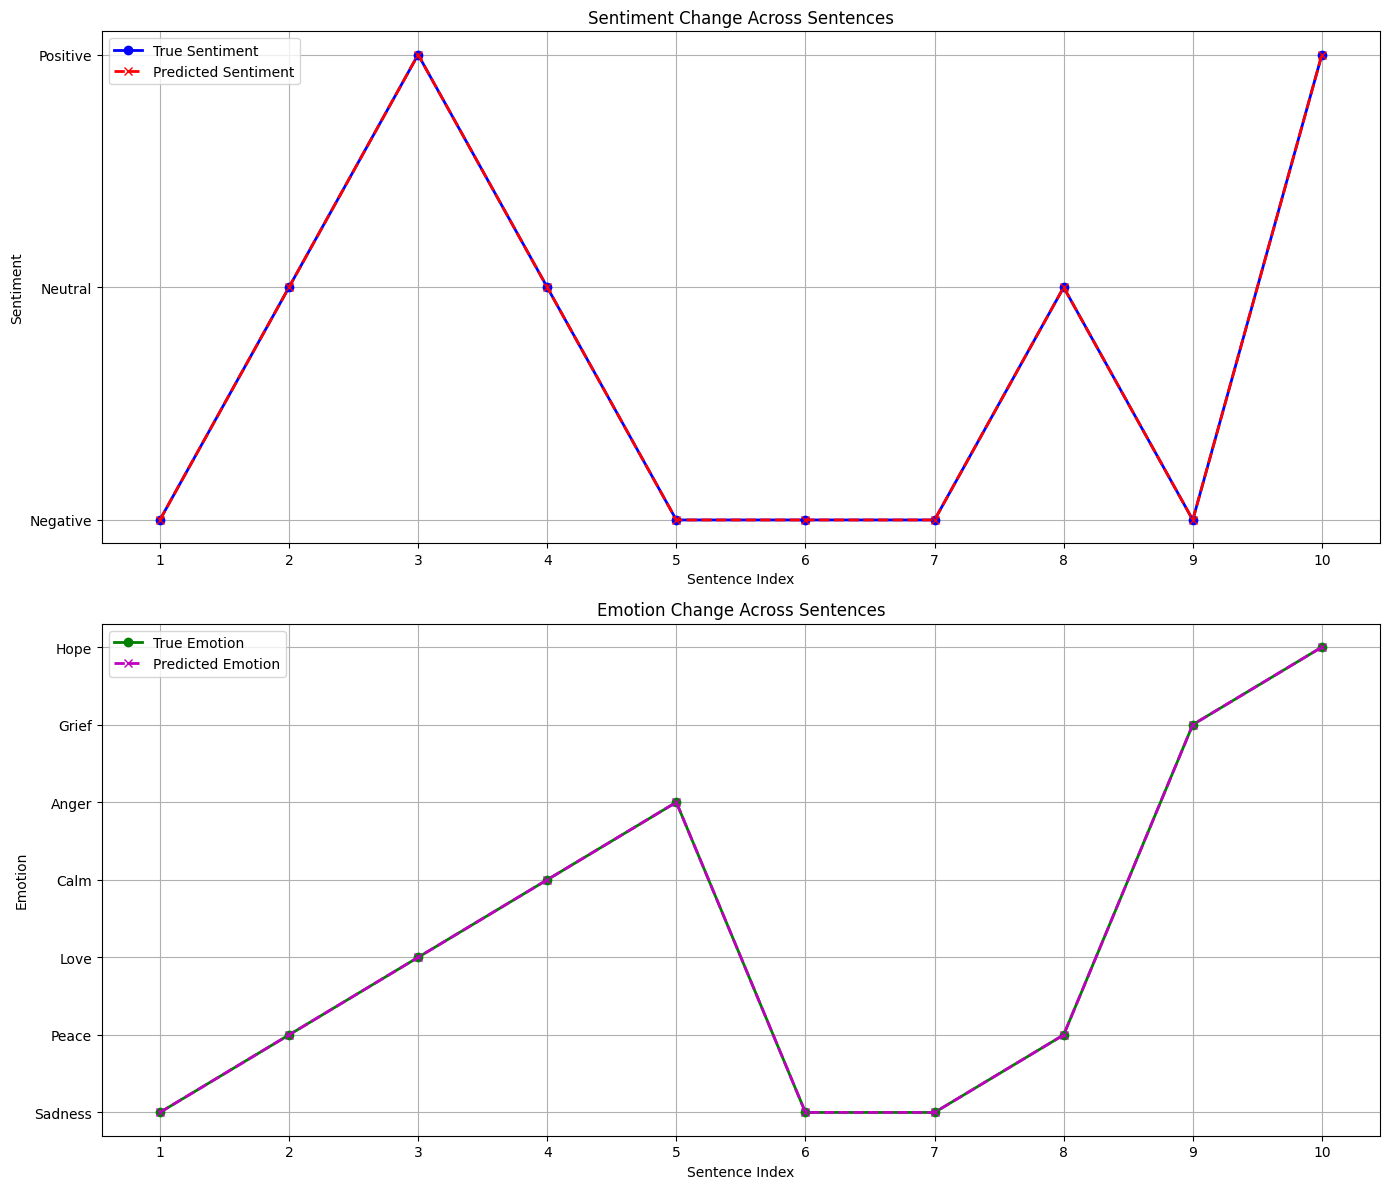

In [6]:
# Line Graph for Sentiment and Emotion Predictions
plt.figure(figsize=(14, 12))

# Sentiment Line Graph
plt.subplot(2, 1, 1)
plt.plot(range(len(sample_sentences)), true_sent_labels, marker='o', linestyle='-', color='b', label='True Sentiment', linewidth=2)
plt.plot(range(len(sample_sentences)), pred_sent_labels, marker='x', linestyle='--', color='r', label='Predicted Sentiment', linewidth=2)
plt.title('Sentiment Change Across Sentences')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment')
plt.xticks(range(len(sample_sentences)), range(1, len(sample_sentences) + 1))
plt.legend()
plt.grid(True)

# Emotion Line Graph
plt.subplot(2, 1, 2)
plt.plot(range(len(sample_sentences)), true_emo_labels, marker='o', linestyle='-', color='g', label='True Emotion', linewidth=2)
plt.plot(range(len(sample_sentences)), pred_emo_labels, marker='x', linestyle='--', color='m', label='Predicted Emotion', linewidth=2)
plt.title('Emotion Change Across Sentences')
plt.xlabel('Sentence Index')
plt.ylabel('Emotion')
plt.xticks(range(len(sample_sentences)), range(1, len(sample_sentences) + 1))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
